#Machine Learning - Regression
##Final Project
###Rhichard Koh

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import uniform
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def stepwiseReg(data): # defines a function called stepwiseReg that takes a single argument data.
    null = LinearRegression().fit(data[['V1']], data['y']) # creates an instance of the LinearRegression class and fits it to the V1 column of the data DataFrame and the y column of the data DataFrame. Assigned to the variable 'null'.
    full = LinearRegression().fit(data.drop(columns=['y']), data['y']) # creates another instance of the LinearRegression class and fits it to all the columns of data except for the y column and the y column itself. Assigned to the variable 'full'.
    features = list(data.drop(columns=['y']).columns) # creates a list of column names from data that excludes the y column. This list of column names will be used later to select features for the model.
    selector = RFE(full, n_features_to_select=1, step=1, verbose=0) # creates an instance of the RFE class and sets its parameters. full is the initial estimator to be used for the RFE algorithm. sets features to select to 1 and step to 1. The resulting feature selector is assigned to the variable 'selector'.
    stepF = selector.fit(data.drop(columns=['y']), data['y']) # uses the fit method of the selector object to select the best features from the data DataFrame.
    return stepF # returns the stepF object, which represents the feature selection process. The selected features can be accessed using the stepF.support_ attribute.

def get_random_vec(N=100, x_name="x", min=-1, max=1): # defines a function called get_random_vec that takes four optional arguments.
    return uniform(min, max).rvs(size=N) # generates a vector of random numbers. The uniform method generates random numbers from a uniform distribution between min and max. 
                                         # The rvs method is then called on the resulting distribution to generate N random numbers from the uniform distribution. These random numbers are returned as a vector.

def get_randomwalk_vec(N=100, x_name="x", min=-1, max=1): # defines a function called get_randomwalk_vec that takes four optional arguments.
    x_ = 0 # initializes a variable called x_ to 0. This variable will be used to keep track of the current value of the random walk.
    v = [] # initializes an empty list called v. This list will be used to store the values of the random walk.
    for i in range(N): # starts a for loop that will execute N times.
        x_ += uniform(min, max).rvs() # generates a random number from a uniform distribution between min and max using the uniform method. 
                                      # The resulting number is added to the current value of x_. This simulates a random walk, where the value of the walk at each step is the sum of the previous value and a random step.
        v.append(x_) # appends the current value of x_ to the v list.
    return v # returns the v list, which contains the values of the random walk.

def simulate(N=100, k=10, M=10): # defines a function called simulate that takes three optional arguments.
    df = pd.DataFrame(np.arange(1, N+1), columns=["V1"]) # creates a pandas DataFrame with a single column called "V1", which contains the integers from 1 to N.
    for i in range(1, k+M+1): # This loop generates k+M columns of random numbers using the get_random_vec function.
        df[f'V{i+1}'] = get_random_vec(N, min=-2.5, max=2.5) # The resulting columns are added to the DataFrame df. The column names are V2 through V{k+M+1}.
    vars = df.columns[1:] # randomly select k features from the DataFrame df using the np.random.choice function.
    features = np.random.choice(vars, k, replace=True) # The selected features are stored in the features variable.
    weights = np.random.uniform(-5, 5, size=k) # generate random weights and an intercept for the linear regression model.
    intercept = np.random.uniform(5, 50, size=1) # The weights are drawn from a uniform distribution between -5 and 5, and the intercept is drawn from a uniform distribution between 5 and 50.
    X = df[features] # selects the features from the DataFrame df and assigns them to the variable X.
    noise = np.random.uniform(-1, 1, size=N) # add random noise to the linear regression model. The noise is drawn from a uniform distribution between -1 and 1.
    y = np.dot(X, weights) + intercept + noise # is added to the dot product of the feature matrix X and the weight vector weights, plus the intercept.
    df['y'] = y # adds the response variable y to the DataFrame 'df'.
    bound = int(np.floor(N/2)) # split the data into a training set and a test set. The first N/2 rows are used for training, and the remaining rows are used for testing.
    df = df.sample(frac=1).reset_index(drop=True) # shuffle
    df_train = df.iloc[:bound] # get training set
    df_test = df.iloc[bound:] # get test set
    m = LinearRegression() # create a linear regression model
    selector = RFE(m, n_features_to_select=k, step=1) # and a recursive feature elimination (RFE) selector.
    selector.fit(df_train[features], df_train['y']) # The RFE selector is fitted to the training data using the fit method.
    est_coefs = np.array(features)[selector.support_] # Get the coefficients of the selected features using the support_ attribute of the RFE object.
    r = len(set(est_coefs).intersection(features)) / len(est_coefs) #Precision version of ratio
    # r = len(set(est_coefs).intersection(features)) / len(features) #Recall version of ratio
    sse = np.sum((selector.predict(df_test[features]) - df_test['y'])**2) # calculate the sum squared error.
    return (round(r, 2), round(sse, 2)) # return the ratio and sse.

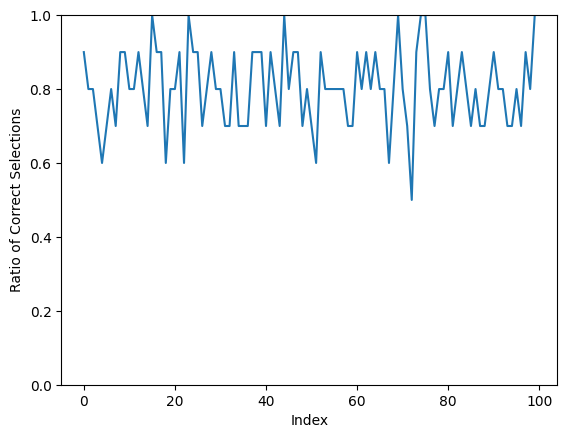

In [3]:
# Play
runs_count = 100
df_results = pd.DataFrame(columns=['rcs', 'sse'])
for i in range(runs_count):
    df_results.loc[i] = simulate(N=200, k=10, M=10)
df_results['rcs'].plot(ylim=[0,1], xlabel='Index', ylabel='Ratio of Correct Selections')
plt.show()

We can see that the ratio fluctuates greatly therefore stepwise regression has a very high varience and only if you're lucky you get to pick the correct selections.

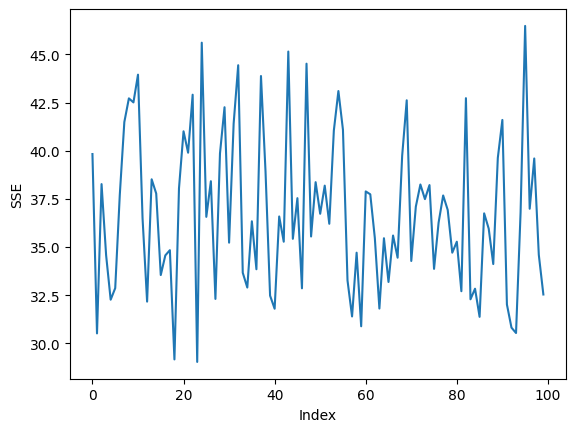

In [4]:
df_results['sse'].plot(xlabel='Index',ylabel='SSE')
plt.show()

We can observe that the SSE sometimes could be very high and a few times very low, this is another reason why we should step away from step wise regression for feature selection.

## Visualizations for get_random_vec() and get_randomwalk_vec() 

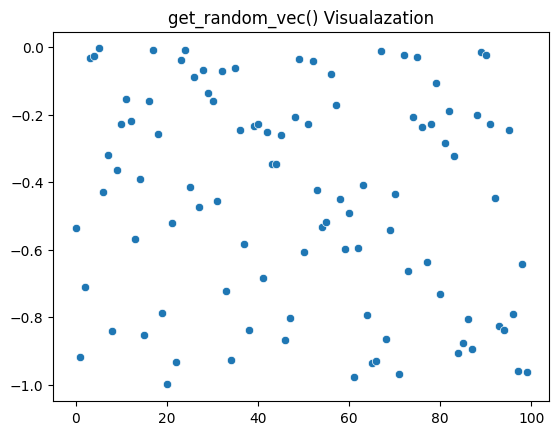

In [5]:
sns.scatterplot(get_random_vec())
plt.title('get_random_vec() Visualazation')
plt.show()

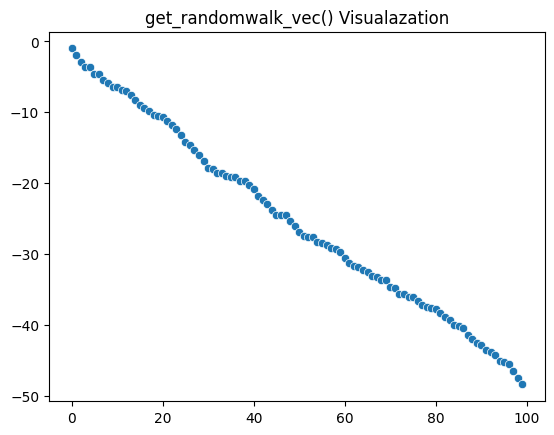

In [6]:
sns.scatterplot(get_randomwalk_vec())
plt.title('get_randomwalk_vec() Visualazation')
plt.show()

We can see the difference between the get_random_vec() and get_randomwalk_vec() is that the get_random_vec() is completely random however get_randomwalk_vec() builds upon the previous value.

## Correlation Matrix Visualizations

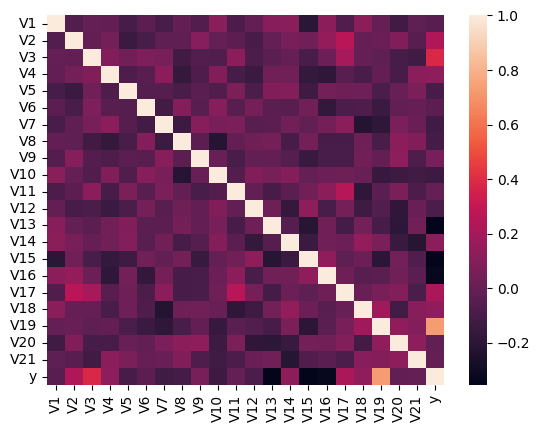

In [27]:
def CorMat(N=100, k=10, M=10):
    df = pd.DataFrame(np.arange(1, N+1), columns=["V1"])
    for i in range(1, k+M+1):
        df[f'V{i+1}'] = get_random_vec(N, min=-2.5, max=2.5)
    vars = df.columns[1:]
    features = np.random.choice(vars, k, replace=True)
    weights = np.random.uniform(-5, 5, size=k)
    intercept = np.random.uniform(5, 50, size=1)
    X = df[features]
    noise = np.random.uniform(-1, 1, size=N)
    y = np.dot(X, weights) + intercept + noise
    df['y'] = y
    bound = int(np.floor(N/2))
    df = df.sample(frac=1).reset_index(drop=True) # shuffle
    df_train = df.iloc[:bound] # get training set
    df_test = df.iloc[bound:] # get test set
    sns.heatmap(df.corr())
    plt.show()
CorMat()

We can see that only the k variables have a high correlation with y. Because when we observe the k variables with each other the correlation is low. When you look at the last row or last column where the y is interacting with the k variables the heat map gets hotter meaning a higher correlation.

## Box Plot Simulation for k=[10,15,20,25,30,35,40] and M=100

Streaming output truncated to the last 5000 lines.
<ipython-input-2-b7a85de070be>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'V{i+1}'] = get_random_vec(N, min=-2.5, max=2.5)
<ipython-input-2-b7a85de070be>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'V{i+1}'] = get_random_vec(N, min=-2.5, max=2.5)
<ipython-input-2-b7a85de070be>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

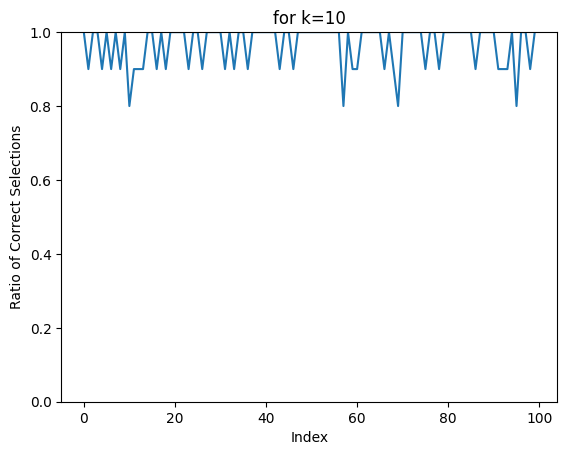

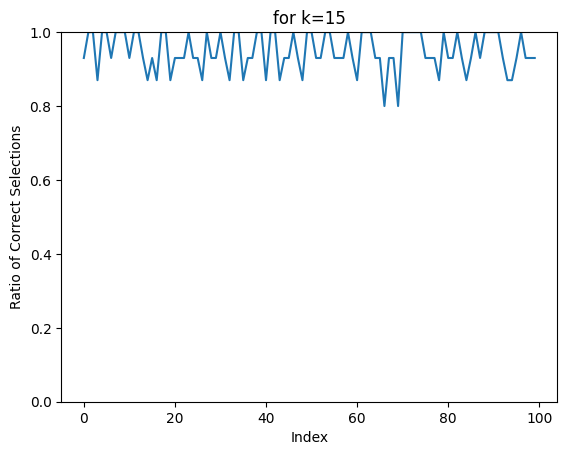

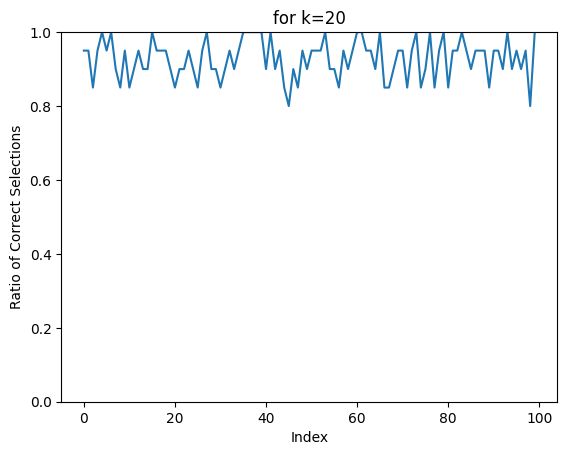

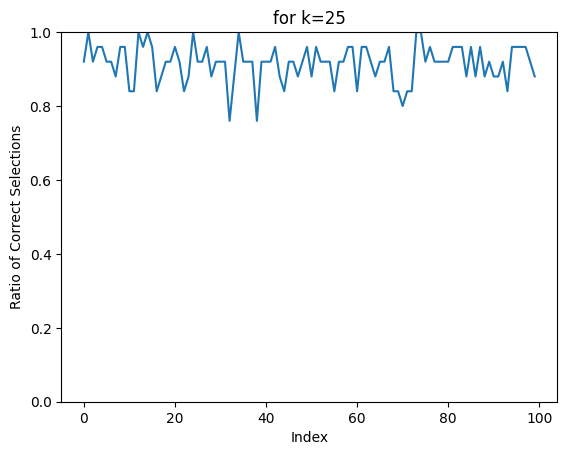

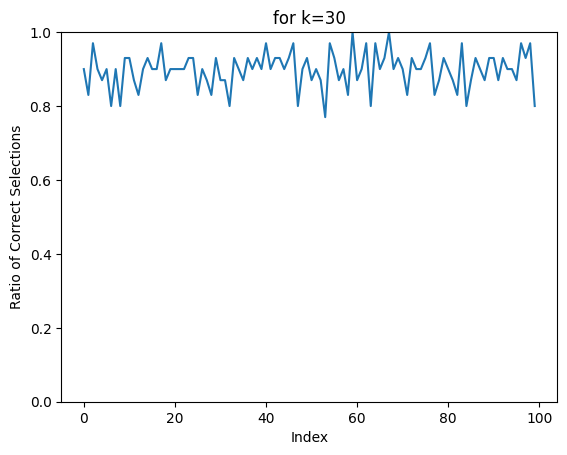

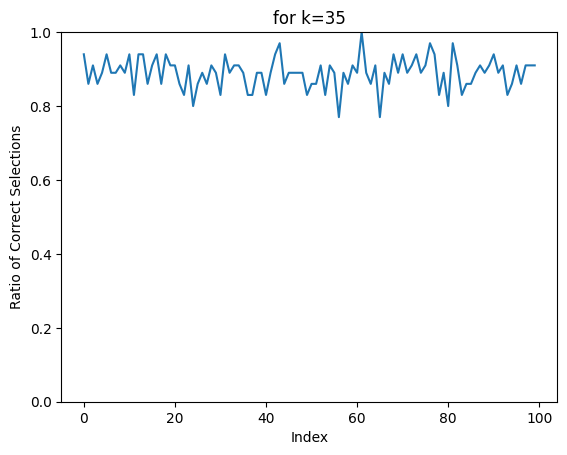

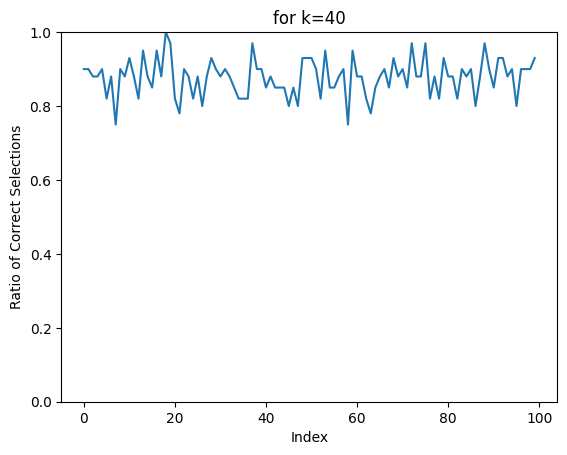

In [7]:
k_list = [10,15,20,25,30,35,40]

runs_count = 100
df_results_ = {}
for k in k_list:
  df_results_[k] = pd.DataFrame(columns=['rcs', 'sse'])
  for i in range(runs_count):
    df_results_[k].loc[i] = simulate(N=200, k=k, M=100)
for k in k_list:
  df_results_[k]['rcs'].plot(ylim=[0,1], xlabel='Index', ylabel='Ratio of Correct Selections', title=f'for k={k}')
  plt.show()

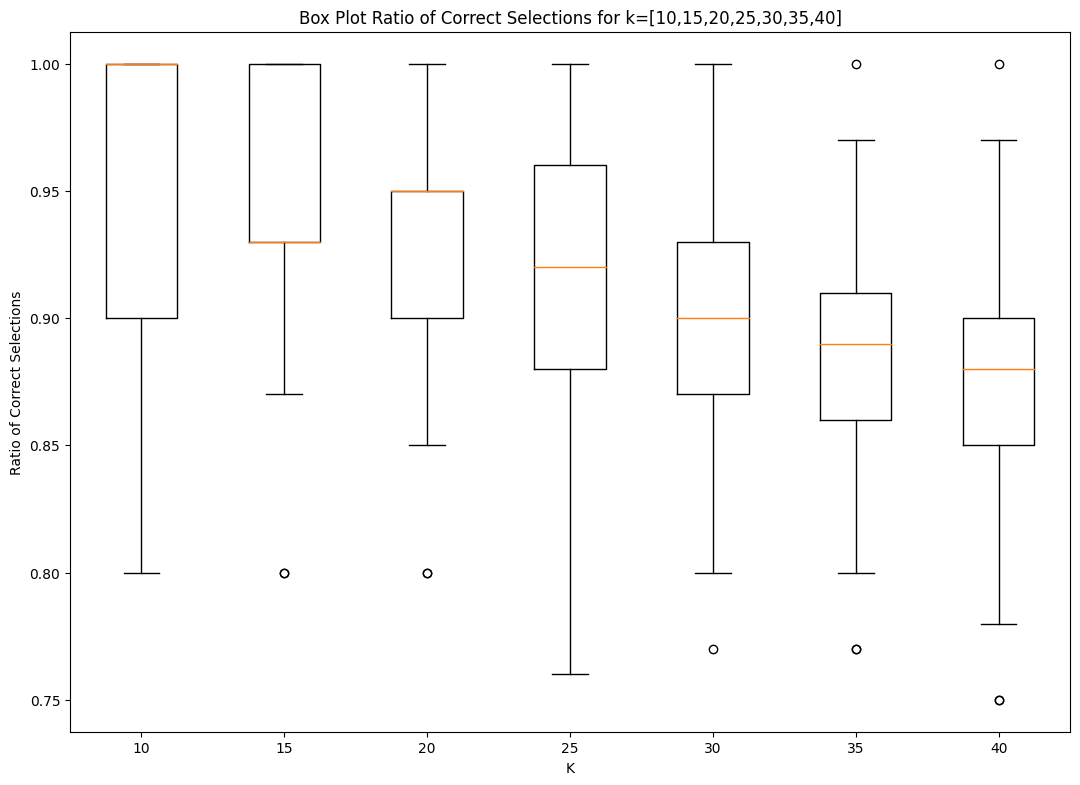

In [8]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot([df_results_[x]['rcs'] for x in df_results_.keys()])
plt.xticks([1,2,3,4,5,6,7],df_results_.keys())
plt.xlabel('K')
plt.ylabel('Ratio of Correct Selections')
plt.title('Box Plot Ratio of Correct Selections for k=[10,15,20,25,30,35,40]')
 
# show plot
plt.show()

We can see that as we get more features the less likely the step wise regression model will pick the correct selection of features.

**References**:

Step away from stepwise

https://journalofbigdata.springeropen.com/articles/10.1186/s40537-018-0143-6

R implementation

https://rpubs.com/uzair/stepwise-regression-simulation